<a href="https://colab.research.google.com/github/jonathans1603/B-Cash/blob/main/25_fix_image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yohanams","key":"77c3f279751c275ded9af956b0a12084"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
#upload file kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                                  title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
teocalvo/teomewhy-loyalty-system                                     TeoMeWhy Loyalty System                           23MB  2024-06-18 13:27:55            209        388  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data       Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26           8599        154  1.0              
damirdizdarevic/uefa-euro-2024-players                               UEFA EURO 2024 - Players                          15KB  2024-06-08 18:07:29           1912         43  1.0              
rabieelkharoua/students-performance-dataset       

In [7]:
! kaggle datasets download -d paramaggarwal/fashion-product-images-dataset

Dataset URL: https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-dataset
License(s): copyright-authors
100% 23.1G/23.1G [02:59<00:00, 237MB/s]
100% 23.1G/23.1G [02:59<00:00, 138MB/s]


In [8]:
! unzip fashion-product-images-dataset.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: fashion-dataset/styles/58128.json  
  inflating: fashion-dataset/styles/58129.json  
  inflating: fashion-dataset/styles/5813.json  
  inflating: fashion-dataset/styles/58131.json  
  inflating: fashion-dataset/styles/58132.json  
  inflating: fashion-dataset/styles/58133.json  
  inflating: fashion-dataset/styles/58135.json  
  inflating: fashion-dataset/styles/58136.json  
  inflating: fashion-dataset/styles/58137.json  
  inflating: fashion-dataset/styles/58138.json  
  inflating: fashion-dataset/styles/58139.json  
  inflating: fashion-dataset/styles/5814.json  
  inflating: fashion-dataset/styles/58140.json  
  inflating: fashion-dataset/styles/58141.json  
  inflating: fashion-dataset/styles/58143.json  
  inflating: fashion-dataset/styles/58144.json  
  inflating: fashion-dataset/styles/58145.json  
  inflating: fashion-dataset/styles/58146.json  
  inflating: fashion-dataset/styles/58147.json  
  inflating:

#Importing Libraries


In [9]:
import pandas as pd
import os
import shutil
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Input, Layer
from tensorflow.keras.utils import to_categorical

In [10]:
base_dir = '/content/fashion-dataset'
image_files_dir = os.path.join(base_dir, 'images')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [11]:
# Menghapus direktori train, validation, dan test jika sudah ada
if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
if os.path.exists(validation_dir):
    shutil.rmtree(validation_dir)
if os.path.exists(test_dir):
    shutil.rmtree(test_dir)

# Membuat ulang direktori train, validation, dan test
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [12]:
styles = pd.read_csv("/content/fashion-dataset/styles.csv", on_bad_lines='skip')
styles['filename'] = styles['id'].astype(str) + '.jpg'
styles.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg


In [13]:
# Filter hanya subkategori "Apparel"
styles = styles[styles['masterCategory'] == 'Apparel']
styles = styles.dropna()
print(styles.head())

      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   
5   1855    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName   filename  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  15970.jpg  
1  2012.0  Casual             Peter England Men Party Blue Jeans  39386.jpg  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  21379.jpg  
4  2012.0  Casual                          Puma Men Grey T-shirt  53759.jpg  
5  2011.0  Casual           Inkfruit Mens Chain Reaction T-shirt   1855.jpg  


In [14]:
styles['present'] = styles['filename'].apply(lambda x: os.path.exists(os.path.join(image_files_dir, x)))
styles = styles[styles['present']].reset_index(drop=True)

In [15]:
desired_article_types = ['Tshirts', 'Jeans', 'Dresses', 'Jackets', 'Shirts', 'Tops', 'Sweaters', 'Skirts']
filtered_styles = styles[styles['articleType'].isin(desired_article_types)]

In [16]:
# Memastikan setiap tipe artikel memiliki minimal 2 gambar
article_type_counts = filtered_styles['articleType'].value_counts()
valid_article_types = article_type_counts[article_type_counts >= 2].index
filtered_styles = filtered_styles[filtered_styles['articleType'].isin(valid_article_types)]

# Membagi dataset menjadi set pelatihan, validasi, dan pengujian
train_data, temp_data = train_test_split(filtered_styles, test_size=0.3, stratify=filtered_styles['articleType'], random_state=42)

temp_data_article_counts = temp_data['articleType'].value_counts()
valid_temp_article_types = temp_data_article_counts[temp_data_article_counts >= 2].index
temp_data = temp_data[temp_data['articleType'].isin(valid_temp_article_types)]

val_data, test_data = train_test_split(temp_data, test_size=0.5, stratify=temp_data['articleType'], random_state=42)

# Membuat subdirektori berdasarkan articleType
for article_type in desired_article_types:
    os.makedirs(os.path.join(train_dir, article_type), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, article_type), exist_ok=True)
    os.makedirs(os.path.join(test_dir, article_type), exist_ok=True)

# Fungsi untuk memindahkan file
def move_files(data, target_dir):
    for _, row in data.iterrows():
        src_path = os.path.join(image_files_dir, row['filename'])
        dst_path = os.path.join(target_dir, row['articleType'], row['filename'])
        if os.path.exists(src_path):
            shutil.copy(src_path, dst_path)

# Memindahkan gambar ke folder train, validation, dan test
move_files(train_data, train_dir)
move_files(val_data, validation_dir)
move_files(test_data, test_dir)

In [17]:
#mengurangi ukurannya karena terlalu besar
IMAGE_SIZE = (150,150)
BATCH_SIZE = 32

# ##pakai ini untu yg lebih kecil
# IMAGE_SIZE = (64,64)
# BATCH_SIZE = 16

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_set = val_datagen.flow_from_directory(
    validation_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 9636 images belonging to 8 classes.
Found 2065 images belonging to 8 classes.
Found 2066 images belonging to 8 classes.


In [19]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=[IMAGE_SIZE[0], IMAGE_SIZE[1], 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=len(desired_article_types), activation='softmax'))

cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = cnn.fit(
    training_set,
    steps_per_epoch=training_set.samples // BATCH_SIZE,
    validation_data=validation_set,
    validation_steps=validation_set.samples // BATCH_SIZE,
    epochs=15
)

Epoch 1/15
301/301 [==============================] - 1000s 3s/step - loss: 1.0363 - accuracy: 0.6631 - val_loss: 0.5489 - val_accuracy: 0.8091
Epoch 2/15
301/301 [==============================] - 969s 3s/step - loss: 0.5425 - accuracy: 0.8001 - val_loss: 0.6304 - val_accuracy: 0.7979
Epoch 3/15
301/301 [==============================] - 914s 3s/step - loss: 0.4546 - accuracy: 0.8316 - val_loss: 0.4070 - val_accuracy: 0.8579
Epoch 4/15
301/301 [==============================] - 908s 3s/step - loss: 0.4031 - accuracy: 0.8528 - val_loss: 0.4397 - val_accuracy: 0.8481
Epoch 5/15
301/301 [==============================] - 977s 3s/step - loss: 0.3711 - accuracy: 0.8638 - val_loss: 0.4169 - val_accuracy: 0.8706
Epoch 6/15
301/301 [==============================] - 928s 3s/step - loss: 0.3366 - accuracy: 0.8765 - val_loss: 0.4016 - val_accuracy: 0.8735
Epoch 7/15
301/301 [==============================] - 973s 3s/step - loss: 0.3397 - accuracy: 0.8735 - val_loss: 0.3609 - val_accuracy: 0.872

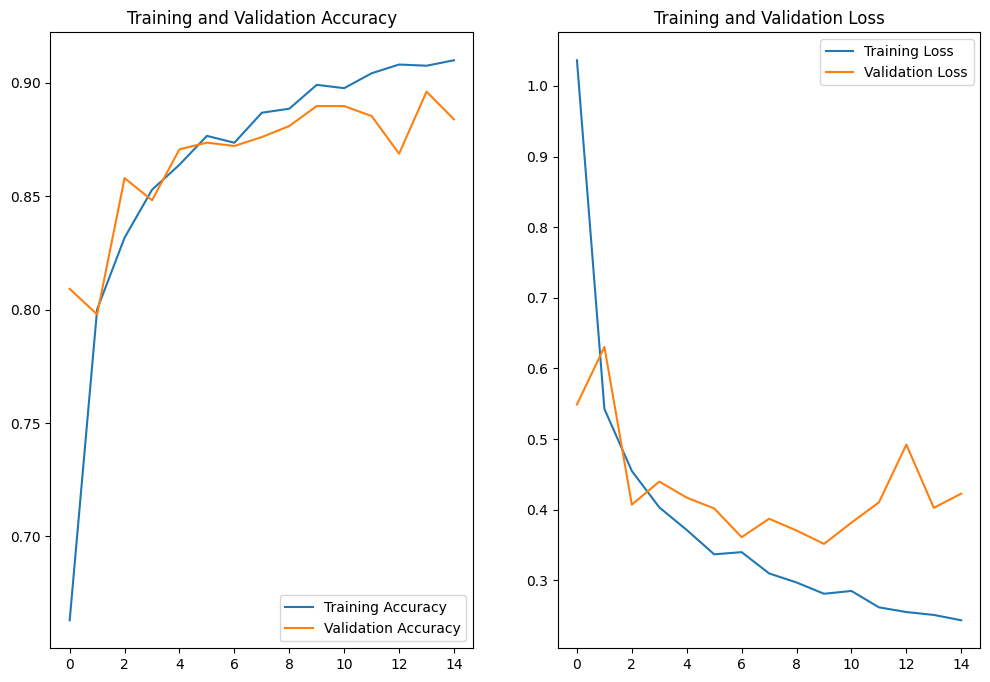

In [21]:
# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

Y_pred = cnn.predict(validation_set)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_set.classes, y_pred))


65/65 [==============================] - 89s 1s/step
Confusion Matrix
[[  0   0   2  17   0   1  10  39]
 [  3   1   0   7   0   0   7  21]
 [  3   2   3  27   0   2  13  40]
 [ 14   6  16 110   3   1  71 261]
 [  0   2   0   7   0   0   4   6]
 [  2   0   2   6   0   0   3  29]
 [  7   6  17  54   0   2  39 139]
 [ 33  14  52 231  14   8 136 572]]


In [23]:
cnn.save('cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
cnn.save('cnn_model.h5')

loaded_model = tf.keras.models.load_model('cnn_model.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

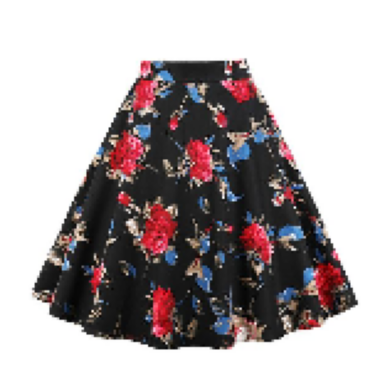

1/1 [==============================] - 0s 70ms/step
Prediksi: Skirts


In [30]:
## UJI GAMBAR

import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Path gambar uji
img_path = '/content/fashion-dataset/rokk.jpg'

img = image.load_img(img_path, target_size=(150, 150))
plt.imshow(img)
plt.axis('off')
plt.show()

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

predictions = cnn.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
class_labels = list(training_set.class_indices.keys())
predicted_label = class_labels[predicted_class[0]]

print(f'Prediksi: {predicted_label}')

In [31]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [32]:
!zip -r fashion-dataset/.zip fashion-dataset/

Output streaming akan dipotong hingga 5000 baris terakhir.
  adding: fashion-dataset/images/18501.jpg (deflated 19%)
  adding: fashion-dataset/images/6632.jpg (deflated 28%)
  adding: fashion-dataset/images/16733.jpg (deflated 50%)
  adding: fashion-dataset/images/2874.jpg (deflated 40%)
  adding: fashion-dataset/images/55974.jpg (deflated 46%)
  adding: fashion-dataset/images/3966.jpg (deflated 9%)
  adding: fashion-dataset/images/8259.jpg (deflated 7%)
  adding: fashion-dataset/images/54110.jpg (deflated 43%)
  adding: fashion-dataset/images/10707.jpg (deflated 10%)
  adding: fashion-dataset/images/2122.jpg (deflated 6%)
  adding: fashion-dataset/images/37652.jpg (deflated 34%)
  adding: fashion-dataset/images/50472.jpg (deflated 3%)
  adding: fashion-dataset/images/26058.jpg (deflated 10%)
  adding: fashion-dataset/images/4614.jpg (deflated 13%)
  adding: fashion-dataset/images/19073.jpg (deflated 23%)
  adding: fashion-dataset/images/11395.jpg (deflated 9%)
  adding: fashion-datase